<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline
matplotlib.style.use('ggplot') 


Load the dataset into a dataframe.


In [83]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
# verifying the empty rows in ConvertedComp column data
df['ConvertedComp'].isnull().value_counts()

# Calculate the mean value of the ConvertedComp column
mean_comp=df['ConvertedComp'].mean()
# print('The mean value of ConvertedComp column data is {}'.format(mean_comp))

# Replace the empty rows with the mean value of the column'
df['ConvertedComp'].fillna(mean_comp,inplace=True)

# verifying if there is still an empty rows after replacing
df['ConvertedComp'].isnull().value_counts()

False    11398
Name: ConvertedComp, dtype: int64

In [5]:
col = ['Age', 'Gender', 'Trans','Sexuality', 'Ethnicity']
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Text(-12.805555555555555, 0.5, 'Number of Survey Respondent')

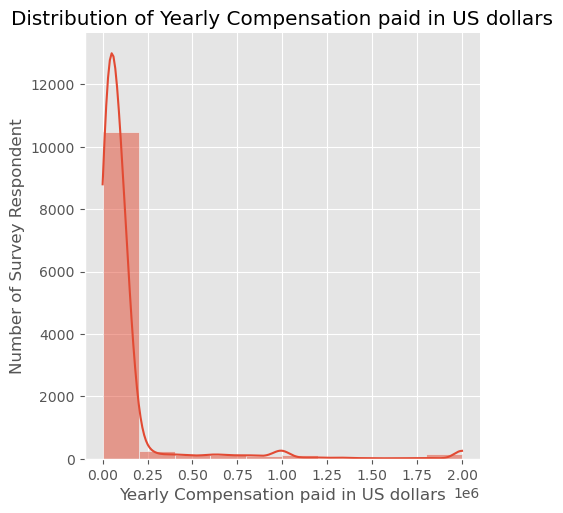

In [6]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'])
# plt.hist(df['ConvertedComp'], color='lightgreen', ec='black', bins=bin_edges)

sns.displot(df['ConvertedComp'], kde=True, bins=bin_edges)
plt.title('Distribution of Yearly Compensation paid in US dollars')
plt.xlabel('Yearly Compensation paid in US dollars')
plt.ylabel('Number of Survey Respondent')


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

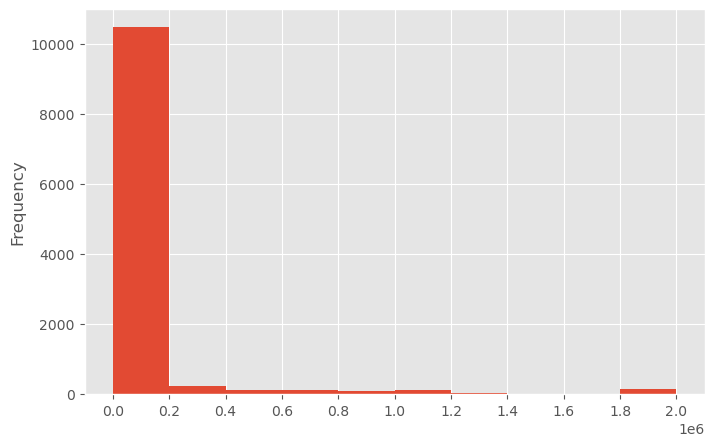

In [7]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'])
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df['ConvertedComp'].median()
print('The median of the ConvertedComp is {}'.format(df['ConvertedComp'].median()))

The median of the ConvertedComp is 63016.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here

male=df[df['Gender']=='Man'].shape[0]
print("{} responders identified themselves only as a Man in our dataset".format(male))

10480 responders identified themselves only as a Man in our dataset


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [68]:
# your code goes here
female=df[df['Gender']=='Woman'].shape[0]
print("{} responders identified themselves only as a Woman in our dataset".format(female))

median_female=df[df['Gender']=='Woman']['ConvertedComp'].median()
print('The median ConvertedComp of responders who identified themselves only as a Woman is {}'.format(median_female))

731 responders identified themselves only as a Woman in our dataset
The median ConvertedComp of responders who identified themselves only as a Woman is 61071.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here

df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


([<matplotlib.axis.XTick at 0x15b38be2850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

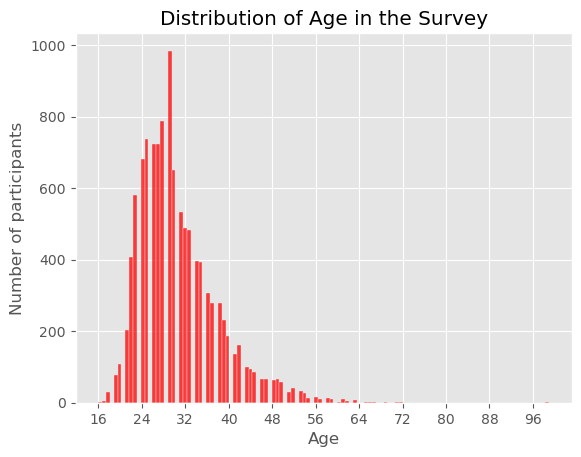

In [86]:
# your code goes here

# replace the empty rows in the age column with the median value
df['Age'].fillna(df['Age'].median(),inplace=True)

#Checking the input of empty rows
df['Age'].isnull().value_counts()

#Plot the histogram
# plt.figure(figsize=(6,10))
sns.histplot(df['Age'],color='red')
plt.title('Distribution of Age in the Survey')
plt.ylabel('Number of participants')
plt.xticks(range(int(df['Age'].min()), int(df['Age'].max()),8))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


([<matplotlib.axis.XTick at 0x15b36975d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

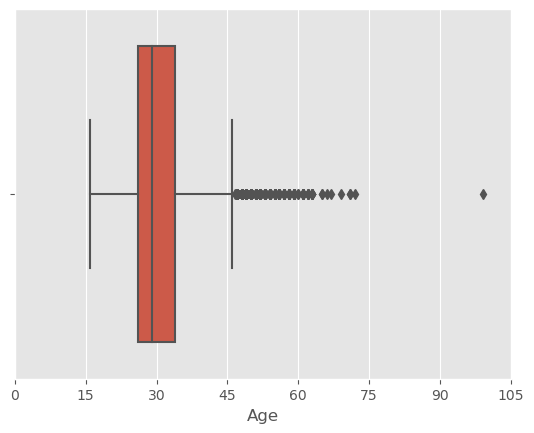

In [13]:
# your code goes here

sns.boxplot(x= df['Age'])
plt.xticks(range(0,120,15))


In [14]:
df["ConvertedComp"].describe()

count    1.139800e+04
mean     1.315967e+05
std      2.840375e+05
min      0.000000e+00
25%      2.901600e+04
50%      6.301600e+04
75%      1.154640e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here

# Find the first and third quartile
Q1=df['ConvertedComp'].describe()['25%']
print('The first quartile (Q1) value is {}'.format(Q1))

# Third Quartile(Q1)
Q3=df['ConvertedComp'].describe()['75%']
print('The Third quartile (Q3) value is {}'.format(Q3))

#Interquartile range(IQR)
IQR=Q3-Q1
print('The IQR value is {}'.format(IQR))

The first quartile (Q1) value is 29016.0
The Third quartile (Q3) value is 115464.0
The IQR value is 86448.0


Find out the upper and lower bounds.


In [20]:
# your code goes here

# Upper bounds
upper_bounds=Q3+(1.5*IQR)
print("Upper bounds value here is {}".format(upper_bounds))


# Lower bounds
lower_bounds=Q1+(1.5*IQR)
print("Lower bounds value here is {}".format(lower_bounds))

Upper bounds value here is 245136.0
Lower bounds value here is 158688.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
outliers= df[df['ConvertedComp']>upper_bounds]['ConvertedComp'].count()
print("There are actually {} outliers in the ConvertedComp column".format(outliers))

There are actually 811 outliers in the ConvertedComp column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
# your code goes here

# creating a new dataframe by isolating the extreme values of ConvertedComp column
new_df = df[df['ConvertedComp']<= upper_bounds]['ConvertedComp']

# verifying that the new dataframe is only made of values equal or less than the upper bounds in convertedcomp column
new_df.describe()

count     10587.000000
mean      66462.393124
std       47453.710082
min           0.000000
25%       26874.000000
50%       57828.000000
75%      100000.000000
max      241112.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [92]:
# your code goes here

# identifying all the numerical columns in our dataframe
dic = dict(df.dtypes)
[(k,)for k,v in dic.items() if v=='float'or v=='int64']

# creating the dataframe of these columns
numeric_df = df[[(k)for k,v in dic.items() if v=='float'or v=='int64']]

# Find the correlation
numeric_df.corr()



,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004282
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.007190
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.103693
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036897
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.021086
Age,0.004282,0.007190,0.103693,0.036897,-0.021086,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
